In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
def fit_kmeans(data, k):
    """
    Fits KMeans clustering on the given data.
    Returns the fitted model and cluster labels.
    """
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)

    cluster_counts = Counter(labels)
    
    return kmeans, labels, cluster_counts

In [3]:
def plot_clusters(data, labels, kmeans):
    """
    Plots the clustered data with different colors.
    """
    plt.figure(figsize=(8, 6))
    
    # Scatter plot with cluster colors
    plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.7, edgecolors='black')

    # Plot cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', edgecolors='black', label='Centroids')

    plt.xlabel("Feature 1 (x)")
    plt.ylabel("Feature 2 (y)")
    plt.title("KMeans Clustering")
    plt.legend()
    plt.grid(True)
    plt.show()


def precompute_decision_boundary(kmeans, resolution=100):
    """
    Precomputes the decision boundary for the given KMeans model
    within a bounded region (0, 20) x (0, 20).
    """
    x_range = np.linspace(0, 20, resolution)
    y_range = np.linspace(0, 20, resolution)
    
    xx, yy = np.meshgrid(x_range, y_range)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict clusters for each point in the grid
    grid_labels = kmeans.predict(grid_points)
    
    return xx, yy, grid_labels.reshape(xx.shape)

def plot_decision_boundary(xx, yy, grid_labels, data, labels, kmeans):
    """
    Plots the precomputed decision boundary along with clustered data.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot the decision boundary
    plt.contourf(xx, yy, grid_labels, alpha=0.3, cmap='viridis')

    # Scatter plot of original data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='black', label="Data Points")
    
    # Plot cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', edgecolors='black', label='Centroids')

    plt.xlabel("Feature 1 (x)")
    plt.ylabel("Feature 2 (y)")
    plt.title("Precomputed KMeans Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
n = 1000
k = 4
corr = np.random.uniform(0, 20, (n, 2))

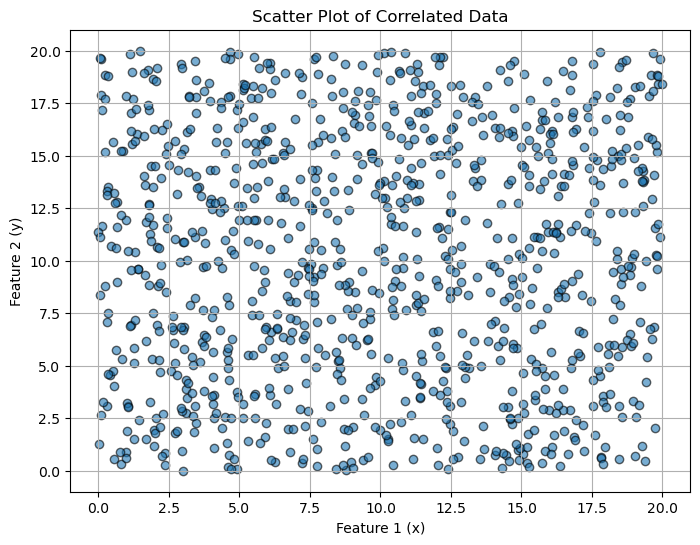

In [5]:
# Extract x and y values
x = corr[:, 0]
y = corr[:, 1]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='black')
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.title("Scatter Plot of Correlated Data")
plt.grid(True)

# Show the plot
plt.show()

Cluster member counts: Counter({0: 265, 3: 260, 1: 243, 2: 232})


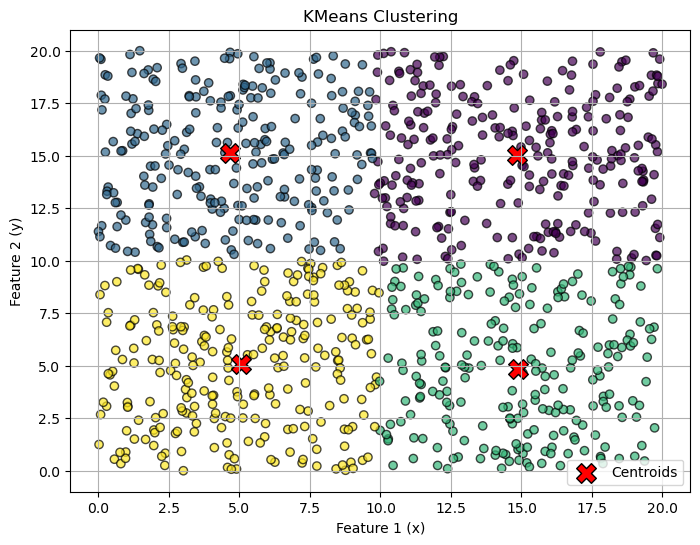

In [6]:
kmeans, labels, cluster_counts = fit_kmeans(corr, k)
print("Cluster member counts:", cluster_counts)
plot_clusters(corr, labels, kmeans)

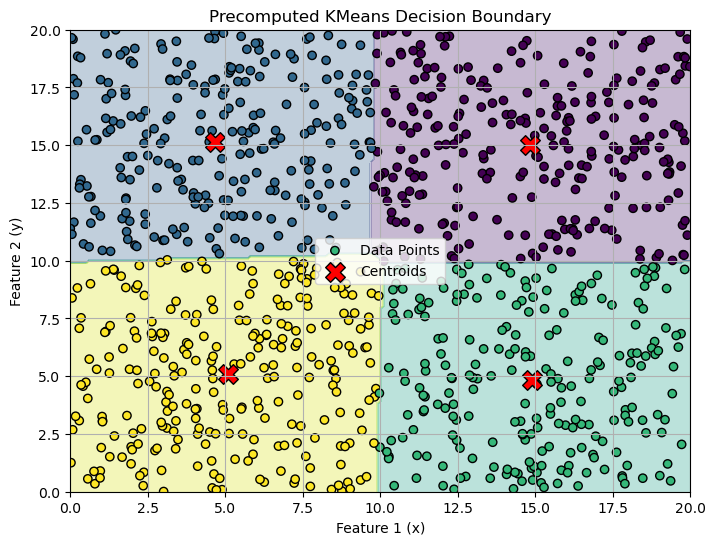

In [7]:
xx, yy, grid_labels = precompute_decision_boundary(kmeans, resolution=200)

# Plot the decision boundary
plot_decision_boundary(xx, yy, grid_labels, corr, labels, kmeans)

#### To quickly finds which cluster is the closest

In [18]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([ 3.81336319,  3.78104026, 10.65140471, 10.55153011]),
 array([ 5.57931198, 13.04064551,  4.64136098, 11.64101548]))

In [9]:
new_labels = kmeans.predict([[1, 2], [20, 20], [1, 20]])
new_labels

array([3, 0, 1], dtype=int32)

we can actually make it cheaper by just check where the corr is in decision boundry but it is barely o(n) so I will not worry about 30ish drivers

#### Let's try with Beta density

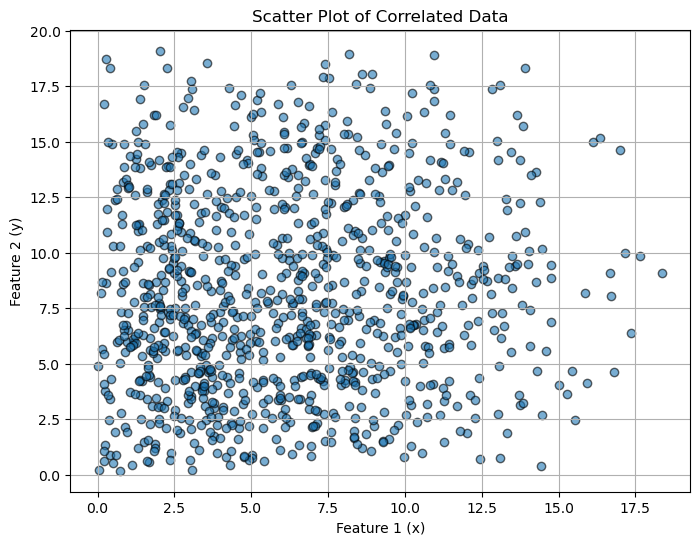

In [19]:
new_corr_x = np.random.beta(1.355, 2.980, (n, 1)) * 20
new_corr_y = np.random.beta(1.590, 2.312, (n, 1)) * 20
plt.figure(figsize=(8, 6))
plt.scatter(new_corr_x, new_corr_y, alpha=0.6, edgecolors='black')
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.title("Scatter Plot of Correlated Data")
plt.grid(True)

# Show the plot
new_corr = np.column_stack((new_corr_x, new_corr_y))

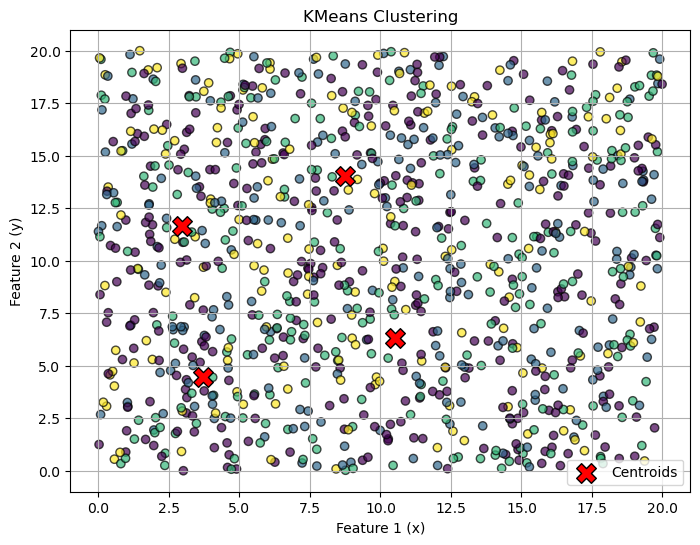

In [20]:
kmeans, labels, cluster_counts = fit_kmeans(new_corr, k)
plot_clusters(new_corr, labels, kmeans)

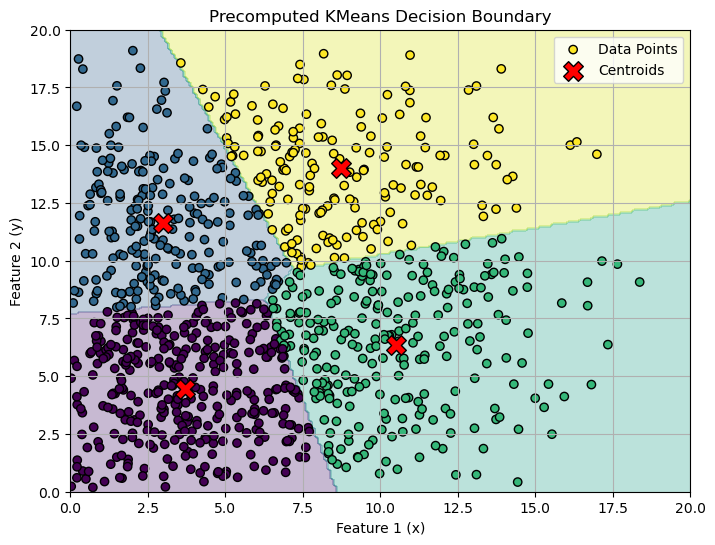

In [21]:
xx, yy, grid_labels = precompute_decision_boundary(kmeans, resolution=200)

# Plot the decision boundary
plot_decision_boundary(xx, yy, grid_labels, new_corr, labels, kmeans)

In [23]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([ 3.70173574,  2.9776435 , 10.50450422,  8.73166376]),
 array([ 4.44801576, 11.64123486,  6.34174414, 14.02959632]))

In [22]:
print("Cluster member counts:", cluster_counts)

Cluster member counts: Counter({0: 347, 2: 256, 1: 225, 3: 172})
